In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [60]:
# matplotlib.rcParams.update({'font.size': 25})

In [134]:

file_name = r"../log_nes_run_1708886709.9512992.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [135]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

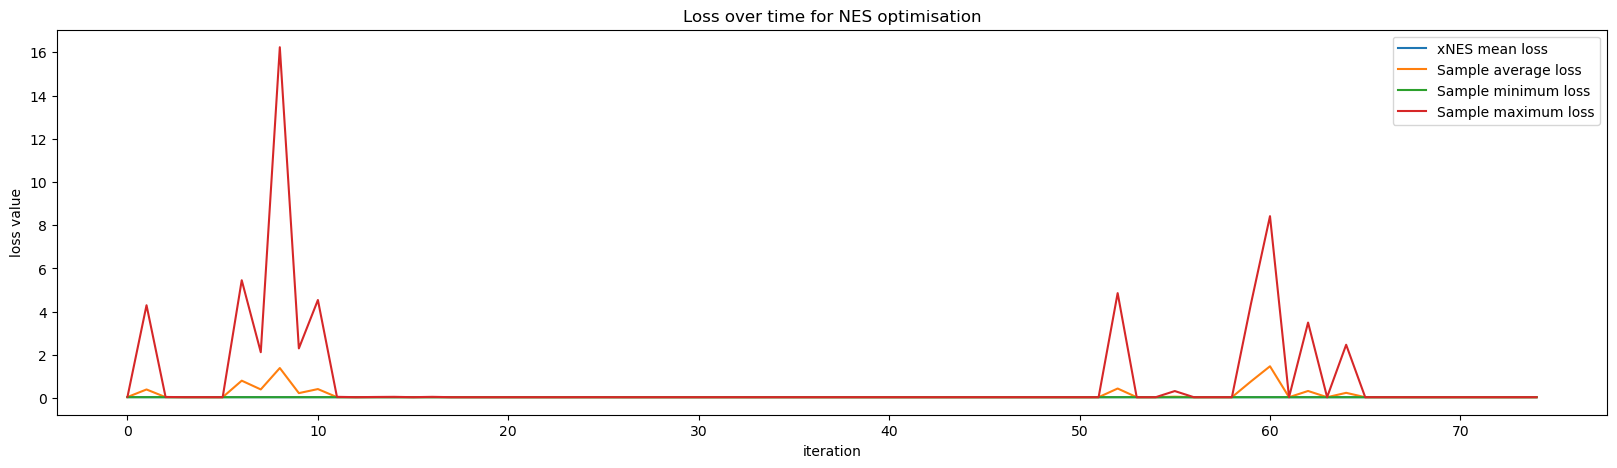

In [136]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

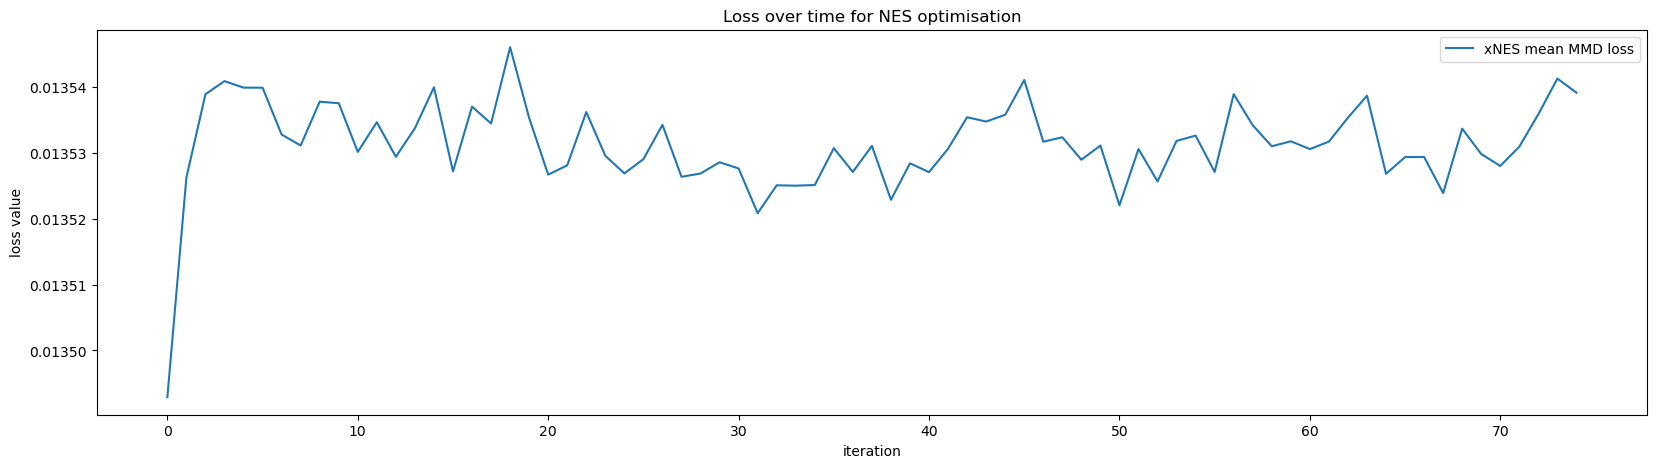

In [137]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

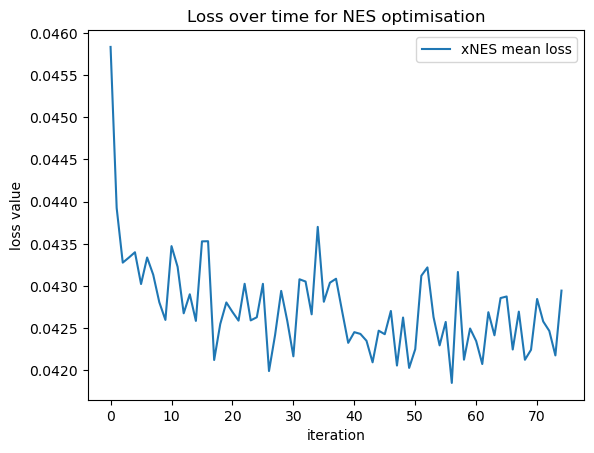

In [138]:
plt.plot(loss_df["mean"], label="xNES mean loss")
# plt.plot(loss_df["avg"], label="Sample average loss")
# plt.plot(loss_df["min"], label="Sample minimum loss")
# plt.plot(loss_df["max"], label="Sample maximum loss")
# plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [139]:
def plot_standing_average(array, show=True):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    plt.plot(standing_average)
    if show:
        plt.show()

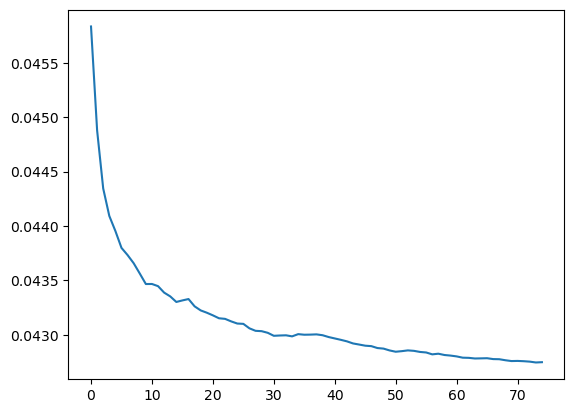

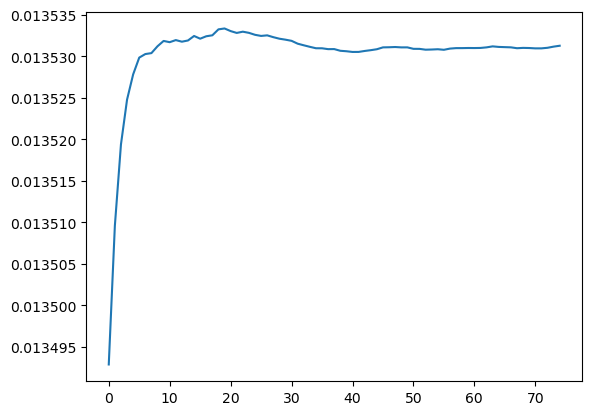

In [140]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False)
# plot_standing_average(loss_df["avg"].to_numpy().squeeze(), show=False)
# plot_standing_average(loss_df["min"].to_numpy().squeeze(), show=False)
# plot_standing_average(loss_df["max"].to_numpy().squeeze(), show=False)
plt.show()

plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [129]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.042758051823410685
std: 0.0005742280133930053
max: 0.0458329245448112
min: 0.0418514013290405
range: 0.003981523215770701


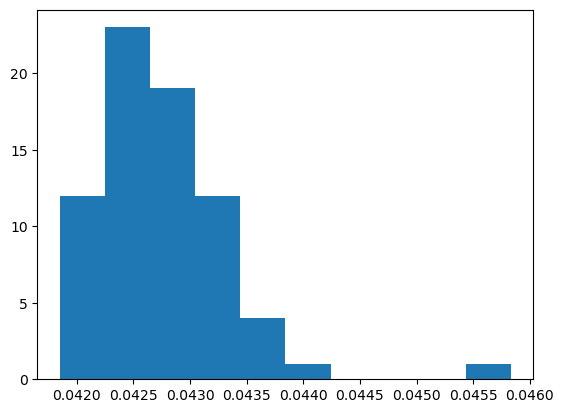

mean: 0.13275261394058663
std: 0.26664005641012567
max: 1.4733613729476929
min: 0.0423879288136959
range: 1.430973444133997


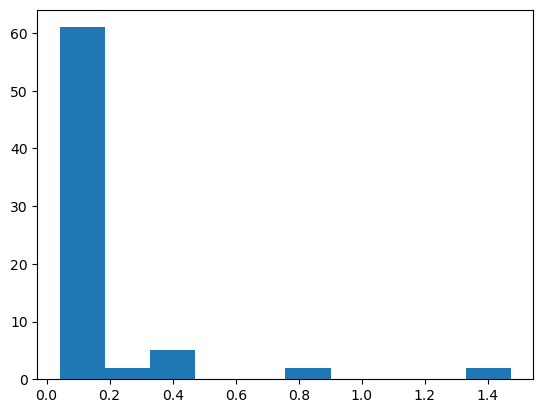

mean: 0.04219573725842763
std: 0.0003684532856167209
max: 0.0434782952070236
min: 0.0415151230990886
range: 0.0019631721079350004


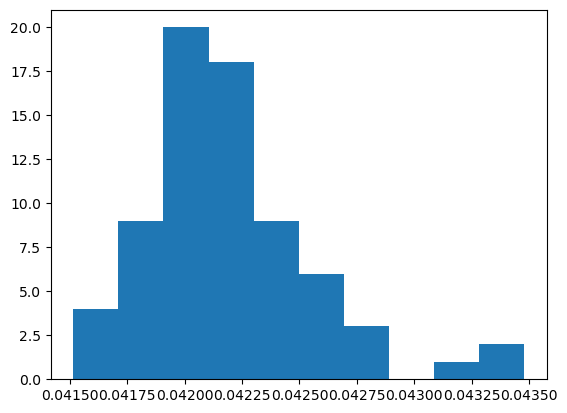

mean: 0.8550772177986801
std: 2.4197541670423934
max: 16.234636306762695
min: 0.0426111109554767
range: 16.19202519580722


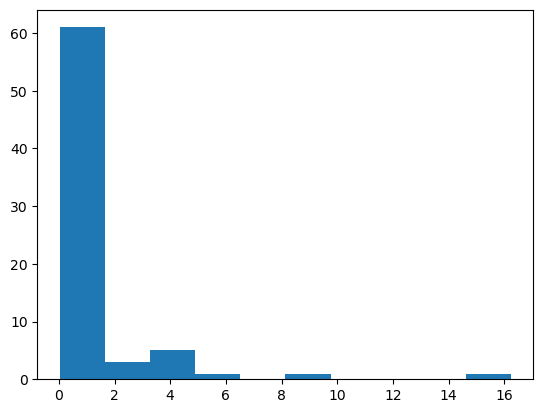

mean: 0.013530927115223433
std: 6.762499148587961e-06
max: 0.0135460803285241
min: 0.013492883183062
range: 5.319714546210032e-05


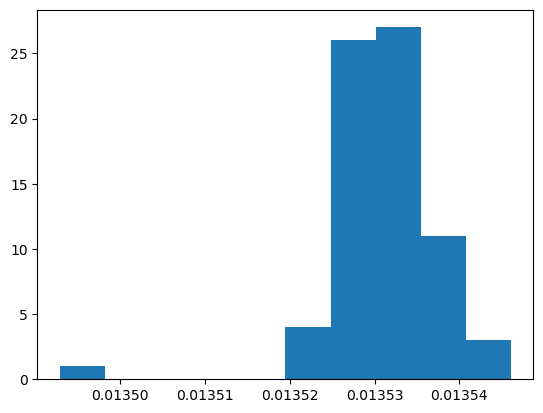

In [130]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg"].to_numpy().squeeze())
print_loss_analysis(loss_df["min"].to_numpy().squeeze())
print_loss_analysis(loss_df["max"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

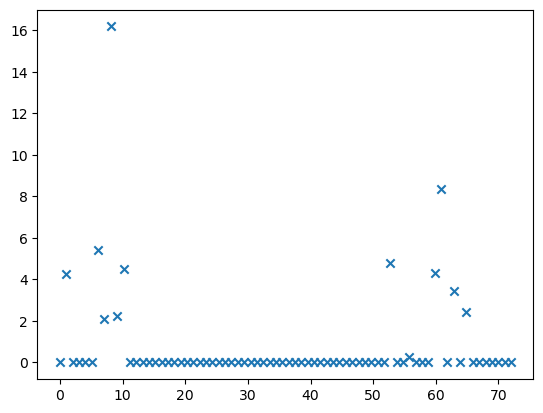

mean: 0.8128814805402524
std: 2.4196938255464344
max: 16.192212264984846
min: 0.0005782134830951968
range: 16.19163405150175


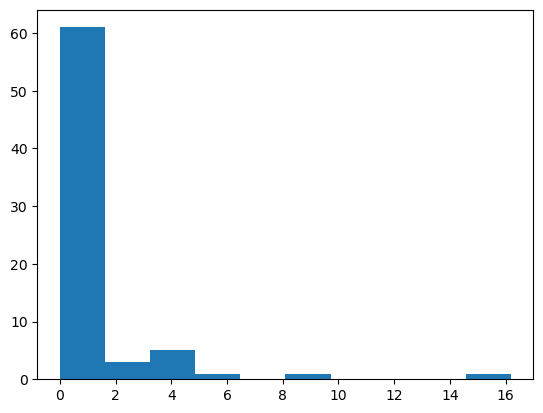

In [131]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())